# Smarty Lab Tutorial

## Preliminaries
Make sure you are using __python3__ as some of the libraries used in this tutorial will not work in python2. 

We will plot and analyse data from the Smarty lab you did earlier in the week. Unfortunately, there was a coordinate frame mismatch with Qualisys which we only fixed after your sessions so we redid the ROV and ASV modes after your session and this is the data you will analyse -> see video https://youtu.be/ta-o7OmPNnI

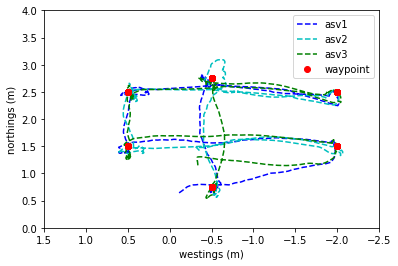 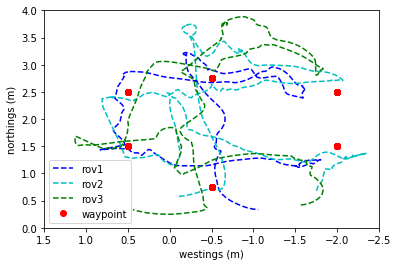

In this tutorial, you will

- plot navigation and control input data of for 3 remotely operated and 3 autonomous waypoint tracking runs
- develop a motion model and apply model based dead reackoning (timestamp interpolation, coordinate transformation)
- compare model based dead reckoning with the autonomous and remote runs

All the data you need can be downloaded from blackboard. Before doing anything, make sure you are running this notebook with Jupyter Python 3. To run a cell with code in it, either click the run botton at the top of the cell or hit SHIFT+RETURN

## Import standard libraries
First import the following standard libraries

In [1]:
import pandas as pd

import math
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Plot navigation and control input data

Your data is in the following folder structure 

data / asv* / *.csv

where you have measurements from qualysis, the onboard imu, waypoints and your thruster commands. These are all in csv format. We can read DataFrames into python use the `read_csv` function. 

In [2]:
position = pd.read_csv('data/asv1/qualisys.csv')
position

,epoch_time,northings (m),westings (m),heading (degrees)
0,1.539755e+09,0.643,-0.112,59.956
1,1.539755e+09,0.643,-0.112,59.956
2,1.539755e+09,0.648,-0.117,62.202
3,1.539755e+09,0.651,-0.119,63.450
4,1.539755e+09,0.653,-0.121,64.698
5,1.539755e+09,0.655,-0.123,66.022
6,1.539755e+09,0.658,-0.125,67.175
7,1.539755e+09,0.660,-0.128,68.364
8,1.539755e+09,0.662,-0.130,69.563
9,1.539755e+09,0.665,-0.132,70.772


When table get to be this size or larger, it is much more helpful to present them in ways other. Here we just ask for the headers using the _list_ function.

******************* code example (copy and paste below) ******************* 

list(position)

We want to plot our northings and westings. We can call a specific column like this (note how a cheeky space has wormed its way into the csv... 

******************* code example (copy and paste below) *******************

position[' northings (m)']

Now plot the data, flipping the x axis as qualysis was returning westing (not eastings... guess what tripped up the autonomous control during your labs?). 

We are going to do this a lot so lets define a function to do it 

*** code example (copy and paste below) ***

def qualysis_plot(df,marker):
    plt.plot(df[' westings (m)'], df[' northings (m)'], marker)
    plt.xlabel('westings (m)');
    plt.ylabel('northings (m)');

and then run the function on our data

*** code example (copy and paste below) ***

qualysis_plot(position,"b.")
plt.gca().invert_xaxis()

Obviously, the value at -9999, -9999 is an error. This is what is stored when qualisys looses sight of Smarty, so lets define a simple function to filter it out.

*** code example (copy and paste below) ***

def qualysis_drop_missing(df):
    return df[df[' westings (m)']!=-9999]

and then apply it to our data and plot the data

*** code example (copy and paste below) ***

position = pd.read_csv('data/asv1/qualisys.csv').pipe(qualysis_drop_missing)

qualysis_plot(position,"b.")

plt.gca().invert_xaxis()

To compare this to what smarty was trying to do, lets overlay our waypoint file. The waypoint file is in the same format as the postion file, so we can reuse our previous functions. We will also add a legend

In [ ]:
waypoint = pd.read_csv('data/asv1/waypoint.csv')
qualysis_plot(position,"b.")
qualysis_plot(waypoint,"ro")
plt.legend(['position', 'waypoint'])
plt.gca().invert_xaxis()

Hopefully that looks sensible. However, it is hard to know where we started and ended so we should also plot the time series for the waypoint and position. Use the definition file below to plot northings (see code below), and also westings and deading waypoint and qualisys time series

* code example (copy and paste below) *

plt.figure()

timeseries_plot(position,' northings (m)',"r.")

timeseries_plot(waypoint,' northings (m)',"r--")

plt.legend(['position', 'waypoint'])

In [ ]:
def timeseries_plot(df,parameter,marker):
    plt.plot(df['epoch_time']-df['epoch_time'][0], df[parameter], marker)
    plt.xlabel('elaspe_time (s)');
    plt.ylabel(parameter);

Now lets plot the thruster commands. First read in the data and check the headings

In [ ]:
compass = pd.read_csv('data/asv1/orientation.csv')
list(compass)

First define a function to wrap the angles so we have angles between +-180 degrees, also we need to account for the fact that qualysis took westings as 0degrees while the compass used northings as 0  degrees. _Note the control was based on qualisys values_.

Now plot these values

* code example (copy and paste below) *

timeseries_plot(compass,' roll (degrees)',"r--")

timeseries_plot(compass,' pitch (degrees)',"b--")

plt.ylabel('angle (degree)');

plt.legend(['roll', 'pitch'])

In [ ]:
compass[' roll (degrees)'][compass[' roll (degrees)']>180] -= 360
compass[' pitch (degrees)'][compass[' pitch (degrees)']>180] -= 360
compass[' heading (degrees)'] = compass[' yaw (degrees)']-270



We can also plot the compass heading mounted on the vehicle against the qualisys heading

In [ ]:
timeseries_plot(compass,' heading (degrees)',"r--")
timeseries_plot(position,' heading (degrees)',"b--")
plt.legend(['compass', 'qualisys'])

Now lets plot the thrust commands. Note, which frame of reference are these in?

In [ ]:
thrust = pd.read_csv('data/asv1/thrust_body.csv')
list(thrust)

Now lets plot the thrust data between some limits. Notice the spikes in the data. This is in the same place where there was not qualysis data. However, this is an event that actually happened in real time control so we can't just filter it out. 

In [ ]:
timeseries_plot(thrust,' thrust_surge (N)',"r--")
timeseries_plot(thrust,' thrust_sway (N)',"g--")
plt.ylabel('thrust (N)');
axes = plt.gca()
axes.set_ylim([-0.5,0.5])
plt.legend(['surge', 'sway'])

plt.figure()
timeseries_plot(thrust,' moment_yaw (Nm)',"b--")
axes = plt.gca()
axes.set_ylim([-0.02,0.02])
plt.ylabel('yaw (Nm)');

That is the navigation and control input data for one run. Lets plot the qualisys plot for all 3 asv runs using the code below.

* code example (copy and paste below) *


qualysis_plot(asv1_position,"b--")
qualysis_plot(asv2_position,"c--")
qualysis_plot(asv3_position,"g--")
qualysis_plot(waypoint,"ro")
axes = plt.gca()
axes.set_xlim([-2.5,1.5])
axes.set_ylim([0.,4])
plt.legend(['asv1', 'asv2', 'asv3', 'waypoint'])
plt.gca().invert_xaxis()


Then do the same for the rov data and compare the data between the same limits. Which is better at controlling the vehicle? the machine or the human?

In [ ]:
asv1_position = pd.read_csv('data/asv1/qualisys.csv').pipe(qualysis_drop_missing)
asv2_position = pd.read_csv('data/asv2/qualisys.csv').pipe(qualysis_drop_missing)
asv3_position = pd.read_csv('data/asv3/qualisys.csv').pipe(qualysis_drop_missing)

rov1_position = pd.read_csv('data/rov1/qualisys.csv').pipe(qualysis_drop_missing)
rov2_position = pd.read_csv('data/rov2/qualisys.csv').pipe(qualysis_drop_missing)
rov3_position = pd.read_csv('data/rov3/qualisys.csv').pipe(qualysis_drop_missing)

And now the thrust command values. Notice the order of magnitude.

In [ ]:
asv1_thrust = pd.read_csv('data/asv1/thrust_body.csv')
asv2_thrust = pd.read_csv('data/asv2/thrust_body.csv')
asv3_thrust = pd.read_csv('data/asv3/thrust_body.csv')

rov1_thrust = pd.read_csv('data/rov1/thrust_body.csv')
rov2_thrust = pd.read_csv('data/rov2/thrust_body.csv')
rov3_thrust = pd.read_csv('data/rov3/thrust_body.csv')

plt.figure()
timeseries_plot(asv1_thrust,' thrust_surge (N)',"b--")
timeseries_plot(asv2_thrust,' thrust_surge (N)',"c--")
timeseries_plot(asv3_thrust,' thrust_surge (N)',"g--")
plt.ylabel('thrust surge (N)');
axes = plt.gca()
axes.set_ylim([-0.5,0.5])
plt.legend(['asv1', 'asv2', 'asv3'])

plt.figure()
timeseries_plot(asv1_thrust,' thrust_sway (N)',"b--")
timeseries_plot(asv2_thrust,' thrust_sway (N)',"c--")
timeseries_plot(asv3_thrust,' thrust_sway (N)',"g--")
plt.ylabel('thrust sway (N)');
axes = plt.gca()
axes.set_ylim([-0.5,0.5])
plt.legend(['asv1', 'asv2', 'asv3'])

plt.figure()
timeseries_plot(asv1_thrust,' moment_yaw (Nm)',"b--")
timeseries_plot(asv2_thrust,' moment_yaw (Nm)',"c--")
timeseries_plot(asv3_thrust,' moment_yaw (Nm)',"g--")
plt.ylabel('moment yaw (N)');
axes = plt.gca()
axes.set_ylim([-0.02,0.02])
plt.legend(['asv1', 'asv2', 'asv3'])

plt.figure()
timeseries_plot(rov1_thrust,' thrust_surge (N)',"b--")
timeseries_plot(rov2_thrust,' thrust_surge (N)',"c--")
timeseries_plot(rov3_thrust,' thrust_surge (N)',"g--")
plt.ylabel('thrust surge (N)');
axes = plt.gca()
axes.set_ylim([-5,5])
plt.legend(['rov1', 'rov2', 'rov3'])

plt.figure()
timeseries_plot(rov1_thrust,' thrust_sway (N)',"b--")
timeseries_plot(rov2_thrust,' thrust_sway (N)',"c--")
timeseries_plot(rov3_thrust,' thrust_sway (N)',"g--")
plt.ylabel('thrust sway (N)');
axes = plt.gca()
axes.set_ylim([-5,5])
plt.legend(['rov1', 'rov2', 'rov3'])

plt.figure()
timeseries_plot(rov1_thrust,' moment_yaw (Nm)',"b--")
timeseries_plot(rov2_thrust,' moment_yaw (Nm)',"c--")
timeseries_plot(rov3_thrust,' moment_yaw (Nm)',"g--")
plt.ylabel('moment yaw (N)');
axes = plt.gca()
axes.set_ylim([-0.2,0.2])
plt.legend(['rov1', 'rov2', 'rov3'])

## Task 2: Develop a motion model

In this section, we estimate the platform movement from its dynamics model, and the actual thruster forces and their respective positions and orientations.

The model inputs are:
* **Mass**: measures the complete platform mass
* **Diameter**: measures the diameter of the vehicle (top view)
* **Height**: measures the height of the submerged section of the vehicle
* **Thrusters**: thuster values imported from the CSV files
* **Compass**: information from the onboard IMU compass sensor

This section contains these parts:
1. Added mass calculation
2. Loading Sway, Surge and Yaw forces
3. Loading IMU (compass) data
4. Interpolate compass data to match forces timestamp
5. Transform forces from local to global reference system
6. Estimate vehicle motion using dynamic model

### Added mass calculation

Before starting with the forces and compass information, we will proceed to define and estimate some vehicle specific parameters. 

Given the platform geometry, and its dimensions, we can calculate its added mass using a cylinder as model. Remember that we are interested only in the height of the submerged section.

* code example (copy and paste below) entering the values you measured *

vehicle_mass = XX # [kg] <---- enter here the valule measured in the lab using the scale
water_density = 1000 # [kg/m3]
vehicle_radius = XX # [m] -  top-view vehicle radius
vehicle_height = XX # [m] - submerged section height

In [ ]:
# These are some constant defined values and vehicle specific parameters
#---------------------------------- insert you code here


#---------------------------------- insert you code here
# First, we compute the actual submerged volume
submerged_volume = math.pi * (vehicle_radius*vehicle_radius) * vehicle_height
# Then, we obtain its mass
added_mass = water_density * submerged_volume

total_mass = vehicle_mass + added_mass
print ("Vehicle mass:", vehicle_mass)
print ("Added mass:", added_mass)
print ("Total hydrodynamic mass:", total_mass)

### Interpolating compass data

For the interpolation process, we use the already available interpolate function from the previous session:

In [1]:
def interpolate(x_query, x_lower, x_upper, y_lower, y_upper):
    if x_upper == x_lower:
        y_query = y_lower
    else:
        y_query = (y_upper-y_lower)/(x_upper-x_lower)*(x_query-x_lower)+y_lower
    return y_query

Interpolate the compass information, using the same epoch_time as for the forces and create a new dataframe

In [ ]:
thrust_epoch = thrust['epoch_time']
heading_epoch = compass['epoch_time']
heading_original = compass[' heading (degrees)']

heading_interpolated = []

j = 0

for i in range(len(thrust_epoch)):
    while j < len(heading_epoch)-1 and heading_epoch[j] < thrust_epoch[i]:
        j = j+1

    if j >= 1:
        heading = interpolate(thrust_epoch[i], 
                            heading_epoch[j-1], 
                            heading_epoch[j], 
                            heading_original[j-1], heading_original[j])
        
        heading_interpolated.append(heading)

  
heading_interpolated_df = pd.DataFrame(columns=['epoch_time',' heading (degrees)'])
heading_interpolated_df['epoch_time']=thrust_epoch
heading_interpolated_df[' heading (degrees)']=heading_interpolated

Check the interpolation has worked by plotting both the original and the interpolated signal. For this, we will define a new function **timeepoch_plot**

In [ ]:
def timeepoch_plot(df,parameter,marker):
    plt.plot(df['epoch_time'], df[parameter], marker)
    plt.xlabel('epoch_time (s)');
    plt.ylabel(parameter);
    

Let's use it to plot the original compass data and the new interpolated heading contained in the DataFrame

In [ ]:

timeepoch_plot(compass,' heading (degrees)',"k+")
# < ----------------------- insert your code here to plot the heading_interpolate_df

# < ----------------------- insert your code here to plot the heading_interpolate_df
plt.ylabel('heading (degrees)');
plt.legend(['original', 'interpolated'])

### Transform forces from local to global reference system

The next step require the transformation of thruster forces from local system (sway/surge) to global coordinates (northings/westings). This can be achieved using a 2D rotation matrix with the heading information:  

R_theta = [cos(theta) -sin(theta); sin(theta) cos(theta)]

We will store this in a data_frame

In [ ]:
thrust_surge = thrust[' thrust_surge (N)'] 
thrust_sway = thrust[' thrust_sway (N)'] 
moment_yaw = thrust[' moment_yaw (Nm)'] 

for i in range(len(heading_interpolated)):
    _c = math.cos(math.radians(heading_interpolated[i]))
    _s = math.sin(math.radians(heading_interpolated[i]))
    
    # < ----------------Implement here the rotation matrix that transform from surge/sway to westings/northings
    thrust_westings  = A*thrust_surge + B*thrust_sway
    thrust_northings = C*thrust_surge + D*thrust_sway
    # < ----------------Implement here the rotation matrix that transform from surge/sway to westings/northings

thrust_inertial_df = pd.DataFrame(columns=['epoch_time',' thrust_westings (N)','thrust_northings (N)', ' moment_yaw (Nm)'])

thrust_inertial_df['epoch_time']=thrust_epoch
thrust_inertial_df[' thrust_westings (N)']=thrust_westings
thrust_inertial_df[' thrust_northings (N)']=thrust_northings
thrust_inertial_df[' moment_yaw (Nm)']=moment_yaw

Lets plot this and make sure it makes sense:

In [ ]:
timeseries_plot(thrust_inertial_df,' thrust_westings (N)',"r.")
timeseries_plot(thrust_inertial_df,' thrust_northings (N)',"b.")

plt.ylabel('thrust (N)');
plt.legend(['westings', 'northings'])
axes = plt.gca()
axes.set_ylim([-0.5,0.5])

### Estimate vehicle motion using dynamic model

Finally, based on the forces described in the global reference system, and setting the initial state of the vehicle as zero, we can estimate the vehicle motion. For this, we will use a simple 2D rigid body model in order to describe the ASV.

The forces excerted upon the vehicle's body are: 
 - Mass and added mass accelerations
 - Sway forge (global reference)
 - Surge forge (global reference)
 - Drag
 
Also, we need to force our initial conditions for both position and velocity
x_init = 0
y_init = 0

vx_init = 0
vy_init = 0

It is also important to notice that our epoch_time vector is not equally spaced, so we will require to extract the actual delta_time for each iteration before integrating the forces/velocities

First define drag variables and initial position

In [ ]:
# Simulation constants
drag_coefficient = 1.2
drag_area = 2*vehicle_radius*vehicle_height

# We require some initial values:
x_init = position[' westings (m)'][0] # <------------ ENTER HERE THE COORDINATES OF YOUR FIRST WAYPOINT
y_init = position[' northings (m)'][0] # <------------ ENTER HERE THE COORDINATES OF YOUR FIRST WAYPOINT

vx_init = <-----------
vy_init = <-----------

Initialise arrays and conditions

In [ ]:
# Here are the empty placeholders for the velocity and position vector
N = len(heading_interpolated)# this is the total number of elements in all our interpolated vectors

pos_x = [0] * N #[0 in range (N)]
pos_y = [0] * N #[0 in range (N)]

velocity_x = <----------------ịnitialise
velocity_y =<----------------ịnitialise

fdrag_x =  <----------------ịnitialise
fdrag_y =  <----------------ịnitialise

# We set the first value for according to our initial conditions
pos_x[0] = x_init
pos_y[0] =  <----------------ịnitialise

velocity_x[0] =  <----------------ịnitialise using previously defined variable vx_init
velocity_y[0] =  <----------------ịnitialise using previously defined variable vy_init

Now, we proceed the model iteration along the time vector starting from the second point (the first was already defined). Current implementation uses a fixed delta_time, but we need to calculate the actual delta_time, which can be extracted from the thrust_epoch vector

In [ ]:
# Now, we proceed the model iteration along the time vector starting from the second point (the first was already defined) 

for i in range(1,N):
    delta_time = 0.333
    delta_time = <---------------- thrust_epoch[actual] - thrust_epoch[previous]

    # The new acceleration value is given by the previous velocity (drag) and the actual forces
    # ax[n] = (Fx[n] - Fdrag[n]) / total_mass
    fdrag_x[i] = 0.5*water_density*drag_coefficient*velocity_x[i-1]*np.abs(velocity_x[i-1])*drag_area
    fdrag_y[i] = 0.5*water_density*drag_coefficient*velocity_y[i-1]*np.abs(velocity_y[i-1])*drag_area
    
    _ax = (thrust_westings[i] - fdrag_x[i])/ total_mass
    _ay = <----------------- complete from northings and fdrag_y[i]

    velocity_x[i] = velocity_x[i-1] + _ax*delta_time
    velocity_y[i] = velocity_y[i-1] + _ay*delta_time

    pos_x[i] = pos_x[i-1] + velocity_x[i]*delta_time
    pos_y[i] = pos_y[i-1] + velocity_y[i]*delta_time
    
plt.figure()
plt.plot(pos_x, pos_y,'b--')
plt.xlabel("westings (m)")
plt.ylabel("northings (m)")
plt.gca().invert_xaxis()
plt.grid(True)

# ALso plot the drag force
plt.figure()
plt.plot(thrust_epoch, fdrag_x,'r--')
plt.plot(thrust_epoch, fdrag_y,'b--')
plt.xlabel("epoch time (s)")
plt.ylabel("drag (N)")

plt.grid(True)

## Task 3: Compare your model with the Qualisys system

Finallly, for this task, we have to visually compare the results obtained from our dynamic model and the position provided by the Qualisys system. For this we use the custom function **quaysis_plot**

In [ ]:
qualysis_plot(position,"b.")
qualysis_plot(waypoint,"ro")
plt.plot(pos_x, pos_y,'g--')
plt.legend(['position', 'waypoint'])
plt.gca().invert_xaxis()
plt.grid(True)

plt.figure()
timeseries_plot(thrust_inertial_df,' thrust_westings (N)',"r.")
# <------------------ complete code here
timeseries_plot(<--------- plot for thrust_northings)
# <------------------ complete code here

plt.ylabel('thrust (N)');
plt.legend(['westings', 'northings'])
plt.plot(thrust_epoch-thrust_epoch[0], fdrag_x,'r--')
# <------------------ complete code here
# Plot for the obtained drag force along axis Y  
# <------------------ complete code here

axes = plt.gca()
axes.set_ylim([-0.5,0.5])